In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import matutils
from sklearn.feature_extraction.text import CountVectorizer
from gensim import models
import random
import glob

path2files="/Users/aiudd75/OneDrive - Amway Corp/MCS/CS598-DM-Capstone/task2/my_cats/"

text = []
c_names = []
cat_list = glob.glob ("../my_cats/*")
cat_size = len(cat_list)
print("cat size", cat_size)
if cat_size < 1:
    print("you need to generate the cuisines files 'categories' folder first")

sample_size = min(50, cat_size)
cat_sample = sorted(random.sample(list(range(cat_size)), sample_size) )
# print ("cat sample", cat_sample)
count = 0
for i, item in enumerate(cat_list):
    if i == cat_sample[count]:
        li =  item.split('/')
        cuisine_name = li[-1]
        c_names.append(cuisine_name[:-4].replace("_"," "))
        with open ( item ) as f:
            mm = f.read().replace("\n", " ")
#             t = preprocess(mm)
#             s = sentence(t)
            text.append(mm)
        count = count + 1
    if count >= len(cat_sample):
        print("generating cuisine matrix with:", count, "cuisines")
        break
print('c_name',c_names)
print('text', len(text))


vectorizer = TfidfVectorizer(max_df=50, max_features=100000,
                                     min_df= 2, stop_words='english',
                                     use_idf=True)
X = vectorizer.fit_transform(text)
print(("n_samples: %d, n_features: %d" % X.shape))
# corpus = matutils.Sparse2Corpus(X,  documents_columns=False)


cat size 86
generating cuisine matrix with: 50 cuisines
c_name ['Filipino', 'Indonesian', 'German', 'Japanese', 'Shanghainese', 'Colombian', 'Middle Eastern', 'Mediterranean', 'Cuban', 'Vegan', 'Belgian', 'Chinese', 'Arabian', 'Salvadoran', 'Persian-Iranian', 'Dim Sum', 'Cheesesteaks', 'French', 'Singaporean', 'Taiwanese', 'Tex-Mex', 'Mexican', 'Irish', 'Coffee  Tea', 'Argentine', 'Scandinavian', 'Ukrainian', 'Wine Bars', 'Steakhouses', 'Szechuan', 'Cantonese', 'Ethiopian', 'Burmese', 'American Traditional', 'Bagels', 'Hawaiian', 'Mongolian', 'Dominican', 'Canadian New', 'Caribbean', 'British', 'Southern', 'Spanish', 'Cambodian', 'Italian', 'Tapas-Small Plates', 'Portuguese', 'Bangladeshi', 'Korean', 'Polish']
text 50
n_samples: 50, n_features: 78013


In [2]:
import pickle
words2ids ={}
for i,word in enumerate(vectorizer.get_feature_names()):
        words2ids[word] = i
with open('words2ids.pickle', 'wb') as f:
        pickle.dump(words2ids,f)

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
import pickle

A_sparse = sparse.csr_matrix(X)

similarities = cosine_similarity(A_sparse)
with open('similarities.pickle', 'wb') as f:
        pickle.dump(similarities,f)
with open('c_names.pickle', 'wb') as f:
        pickle.dump(c_names,f)
# print('pairwise dense output:\n {}\n'.format(similarities))

In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.sum(similarities,axis = 0)
plt.plot(similarities[0], 'ro')
plt.show()


<Figure size 640x480 with 1 Axes>

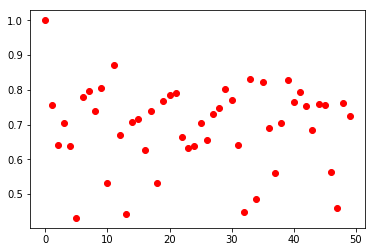

In [5]:
import numpy as np
import matplotlib.pyplot as plt

similarities = similarities/.8
similarities[similarities > 1] = 1
plt.plot(similarities[0], 'ro')
plt.show()

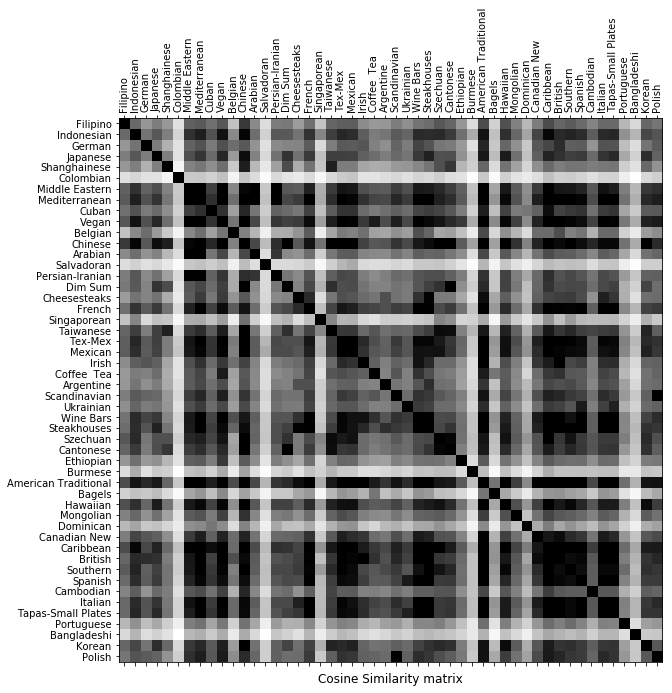

In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm as cm
labels = []
for c in c_names:
    labels.append(c)
fig, ax = plt.subplots(figsize=(10,10))
cmap = cm.get_cmap('Greys')
# similarities = similarities/.8
# similarities[similarities > 1] = 1
cax = ax.matshow(similarities, cmap = 'Greys')
# ax.grid(True) 
plt.title('Cosine Similarity matrix', y= -0.05)
plt.xticks(range(50), labels, rotation=90)
plt.yticks(range(50), labels)
# fig.colorbar(cax, ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, .75,.8,.85,.90,.95,1])
plt.show()

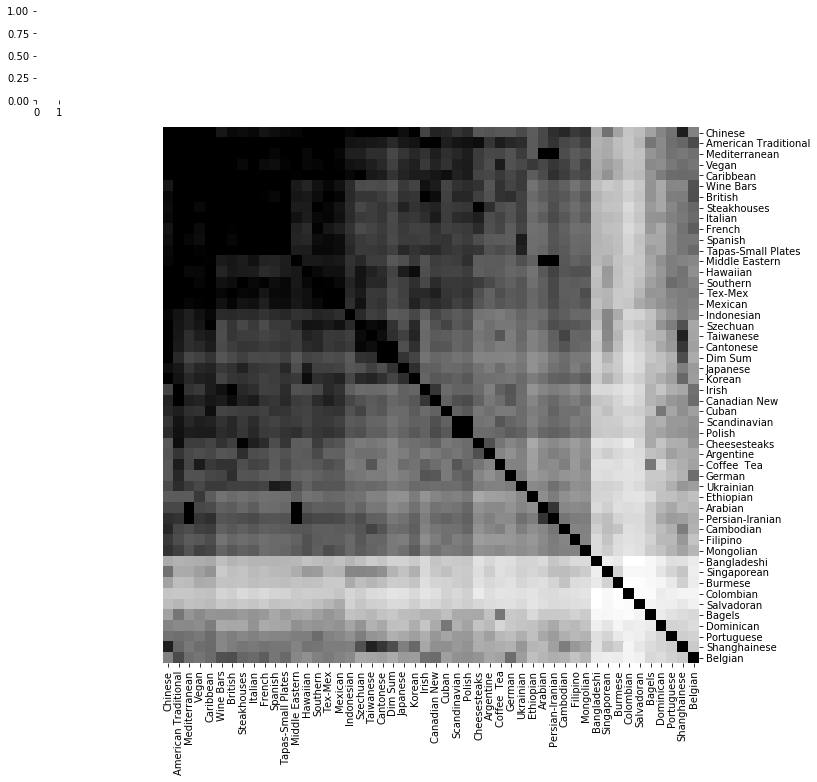

In [12]:
import seaborn as sns
from matplotlib import cm as cm
import matplotlib.pyplot as plt
from matplotlib import cm as cm

labels = []
for c in c_names:
    labels.append(c)
# cmap = cm.get_cmap('Greys')
# sns.heatmap()
cuisine_matrix = similarities
cuisine_matrix[cuisine_matrix > 1] = 1
cax = sns.clustermap( data = cuisine_matrix, figsize=(12,12)
                     , xticklabels=labels
                     , yticklabels = labels
                     , cbar = False
                     , cmap = 'Greys'
                     ,method='complete'
                     ,linecolor='white'
                     ,square=True
                    )
cax.ax_row_dendrogram.set_visible(False)
cax.ax_col_dendrogram.set_visible(False)


In [8]:
'''clustering '''

def get_groups(c_names, km):
    gp0,gp1,gp2,gp3,gp4, gp5, gp6 = [],[],[],[],[],[], []
    tgp = []
    for i, c in enumerate(c_names):
        if km[i] == 0:
            gp0.append(c)
        elif km[i] == 1:
            gp1.append(c)
        elif km[i] == 2:
            gp2.append(c)
        elif km[i] == 3:
            gp3.append(c)
        elif km[i] == 4:
            gp4.append(c)
        elif km[i] == 5:
            gp5.append(c)
        elif km[i] == 6:
            gp6.append(c)
    tgp.append(gp0)
    tgp.append(gp1)
    tgp.append(gp2)
    tgp.append(gp3)
    tgp.append(gp4)
    tgp.append(gp5)
    tgp.append(gp6)
    return tgp   

import matplotlib.pyplot as plt
from matplotlib import cm as cm
labels = []
for c in c_names:
    labels.append(c)

from sklearn.cluster import KMeans
import numpy as np

dist_similarities = 1.0 - np.array(similarities) 
# print(similarities)
X = np.array(dist_similarities)
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)
km = kmeans.labels_
# print(km)
# print(c_names)
gp = get_groups(c_names, km)
print(gp)


# fig, ax = plt.subplots(figsize=(10,10))
# cmap = cm.get_cmap('Greys')
# # similarities = similarities/.8
# # similarities[similarities > 1] = 1
# cax = ax.matshow(similarities, cmap = 'Greys')
# # ax.grid(True) 
# plt.title('Cosine Similarity matrix', y= -0.05)
# plt.xticks(range(50), labels, rotation=90)
# plt.yticks(range(50), labels)
# plt.show()

[['Filipino', 'Shanghainese', 'Arabian', 'Persian-Iranian', 'Argentine', 'Ethiopian', 'Mongolian', 'Cambodian'], ['Indonesian', 'Japanese', 'Dim Sum', 'Taiwanese', 'Szechuan', 'Cantonese', 'Korean'], ['Colombian', 'Salvadoran'], ['Middle Eastern', 'Mediterranean', 'Vegan', 'Chinese', 'French', 'Tex-Mex', 'Mexican', 'Wine Bars', 'Steakhouses', 'American Traditional', 'Hawaiian', 'Caribbean', 'British', 'Southern', 'Spanish', 'Italian', 'Tapas-Small Plates'], ['Singaporean', 'Burmese', 'Bangladeshi'], ['Belgian', 'Bagels', 'Dominican', 'Portuguese'], ['German', 'Cuban', 'Cheesesteaks', 'Irish', 'Coffee  Tea', 'Scandinavian', 'Ukrainian', 'Canadian New', 'Polish']]


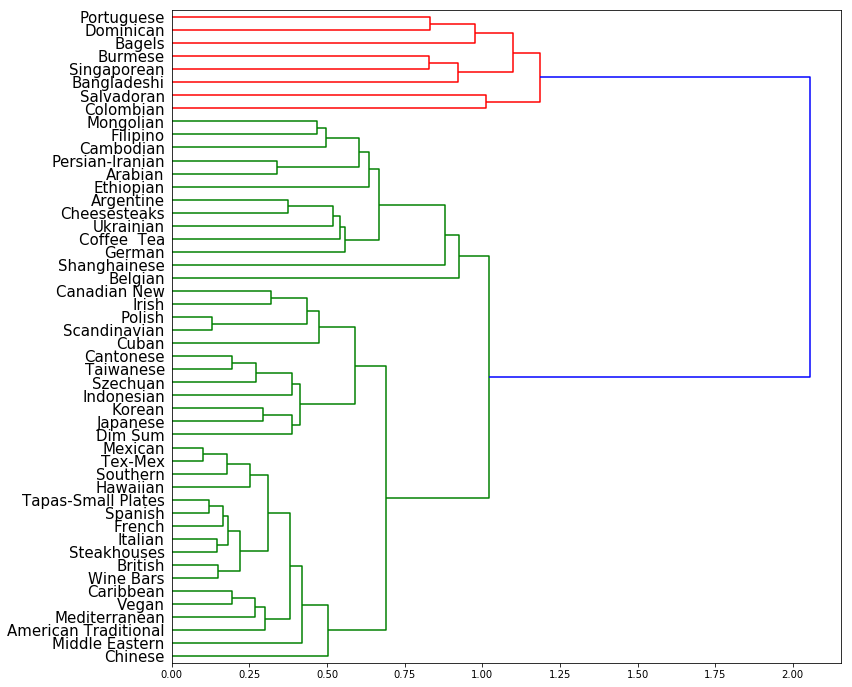

In [9]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

X = np.array(similarities)
labels = []
# print(csm)
for c in c_names:
    labels.append(c)
Z = hierarchy.linkage(X, 'average')
plt.figure(figsize=(12,12))
dn = hierarchy.dendrogram(Z, labels = labels, orientation = 'right', leaf_font_size = 15)